# Домашнее задание №3

In [0]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [2]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


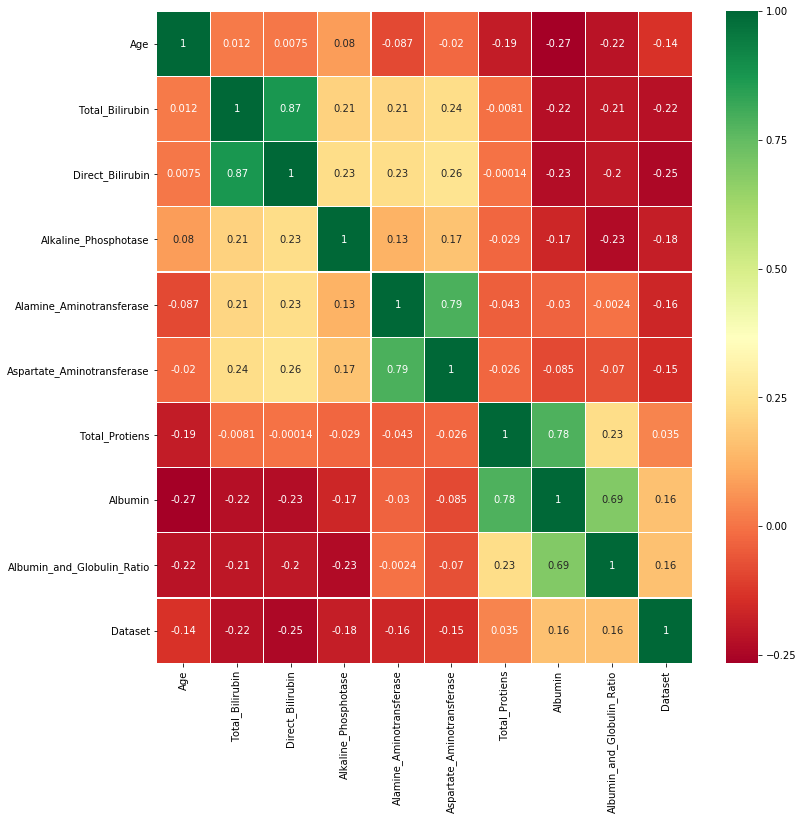

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

intercept: 0.1811674367972489
slope: [0.39557996]


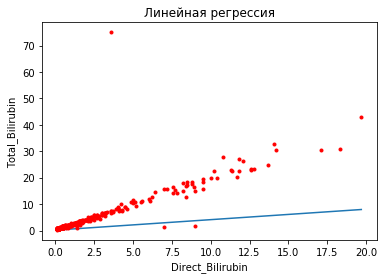

In [5]:
# Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график.
# Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы
# с помощью метода predict() и сравнить с результатом табличным.

from sklearn.linear_model import LinearRegression

Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Direct_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()


intercept: 0.024406335736012696
slope: [0.48923774]


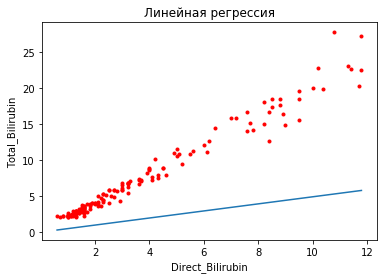

array([5.35709773])

In [12]:
# убираем выбросы, так как график плохо описывает выборку
Total_Bilirubin = data['Total_Bilirubin']
data=data.loc[data['Total_Bilirubin']<30,:]
data=data.loc[data['Total_Bilirubin']>1,:]
# не помогло убрать выбросы

from sklearn.linear_model import LinearRegression

Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Direct_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()

# предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

model.predict(np.array([10.9]).reshape(-1, 1))
# модель неплохо предсказывает: при Direct_Bilirubin = 10, модель предсказывет Total_Bilirubin = 5,
# по таблицу Total_Bilirubin = 5.5

In [17]:
# Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров.
# Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и
# сравнить результат модели от табличного значения.

# Из ковариационной матрицы выше найдем наиболее коррелирующие с Dataset показатели:
# Total_Protiens и Alkaline_Phosphotase
from sklearn.linear_model import LinearRegression

TP = data['Total_Protiens']
AP = data['Alkaline_Phosphotase']
Dataset = data ['Dataset']
x = np.vstack([np.array(TP), np.array(AP)]).T
print('x - это двухмерная матрица, где колонки - это TP, AP: ')
print(x[:3])
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

# предскажем значение Dataset при TP = 6.8, AP = 182
print('Предсказание модели: ', model.predict(x[0:2]))

x - это двухмерная матрица, где колонки - это TP, AP: 
[[  6.8 187. ]
 [  7.5 699. ]
 [  7.  490. ]]
intercept: 1.30560966027368
slope: [ 0.01240646 -0.00034275]
Предсказание модели:  [1.32588019 1.15907908]


In [19]:
# Посчитать квартили для всех колонок
data.quantile([.10, .25, .50, .75], axis = 0)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,32.0,2.4,1.1,168.0,25.0,32.0,5.1,1.8,0.46,1.0
0.25,38.0,2.8,1.4,209.0,37.0,51.0,5.6,2.2,0.60,1.0
0.50,47.0,4.5,2.3,282.0,59.0,88.0,6.4,2.8,0.74,1.0
0.75,60.0,8.9,4.5,415.0,123.0,200.0,7.0,3.2,1.00,1.0


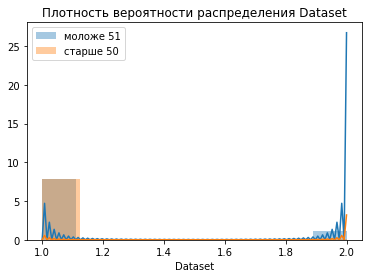

Среднее значения заболеваемости у людей моложе 51: 1.1263157894736842
Среднее значения заболеваемости у людей старше 50: 1.0151515151515151
Квантили 0.5 для людей моложе 51: 0.5    1.0
Name: Dataset, dtype: float64
Квантили 0.5 для людей старше 50: 0.5    1.0
Name: Dataset, dtype: float64


In [25]:
# Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет,
# и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

age_before_51 = data[data['Age']<51]['Dataset']
age_after_50 = data[data['Age']>50]['Dataset']
sns.distplot(age_before_51)
sns.distplot(age_after_50)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['моложе 51', 'старше 50'])
plt.show()

print('Среднее значения заболеваемости у людей моложе 51:', age_before_51.mean())
print('Среднее значения заболеваемости у людей старше 50:', age_after_50.mean())

print('Квантили 0.5 для людей моложе 51:', age_before_51.quantile([.5]))
print('Квантили 0.5 для людей старше 50:', age_after_50.quantile([.5]))

# учитывая тип данных Dataset - сложно делать выводы по графику,
# средние значения и квантили не дают информации и примерно равны

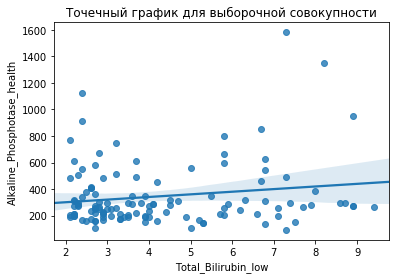

Ttest_1sampResult(statistic=1.812425335942307, pvalue=0.07659546079144053)

In [29]:
# Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у людей с высоким Alkaline_Phosphotase.
# Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

Total_Bilirubin_low = data[data['Total_Bilirubin']<10]['Total_Bilirubin']
Alkaline_Phosphotase_health = data[data['Total_Bilirubin']<10]['Alkaline_Phosphotase']
sns.regplot(x= Total_Bilirubin_low, y=Alkaline_Phosphotase_health,data=data, fit_reg=True)
plt.xlabel('Total_Bilirubin_low')
plt.ylabel('Alkaline_Phosphotase_health')
plt.title('Точечный график для выборочной совокупности')
plt.show()

Illness = data[data['Total_Bilirubin']>8]['Alkaline_Phosphotase']
stats.ttest_1samp(Illness, data['Alkaline_Phosphotase'].mean())

# p-value больше 5%, значит выборка схожа с совокупной выборкой

In [31]:
# Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin).
# Имеют ли данные группы схожесть?

ill = data[data['Total_Bilirubin']>8]['Dataset']

health = data[data['Total_Bilirubin']<=8]['Dataset']

stats.ttest_ind(ill, health)

# T-значение -2.41, p-value равно 0.02, что меньше стандартной альфа ошибки 0.05,
# поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие
# между показателем Total_Bilirubin у здоровых и больных людей.

Ttest_indResult(statistic=-2.406224421450866, pvalue=0.017265461064635845)

In [10]:
# Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет,
# 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Alkaline_Phosphotase.
# Сравнить с реальностью (они логично что будут отличаться).

import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
Age_young = data[data['Age']<=30]['Alkaline_Phosphotase']
Age_middle = data[data['Age']>30]['Alkaline_Phosphotase']

stats.ttest_ind(Age_young, Age_middle)

# по группе молодого и среднегнего возраста людей  выборки показателей Alkaline_Phosphotase
# однородны (статистически похожи),так как pvalue > 5%

Ttest_indResult(statistic=-1.8970882976167256, pvalue=0.0583118932171308)

In [8]:
Age_young = data[data['Age']<=30]['Alkaline_Phosphotase']
Age_old = data[data['Age']>=56]['Alkaline_Phosphotase']

stats.ttest_ind(Age_young, Age_old)

# по группе молодого и пожилого возраста людей  выборки показателей Alkaline_Phosphotase
# статистически различаются,так как pvalue < 5%

Ttest_indResult(statistic=-2.5083490517803386, pvalue=0.012714232008776877)

In [9]:
Age_middle = data[data['Age']>30]['Alkaline_Phosphotase']
Age_old = data[data['Age']>=56]['Alkaline_Phosphotase']

stats.ttest_ind(Age_middle, Age_old)

# по группе среднего и пожилого возраста людей  выборки показателей Alkaline_Phosphotase
# однородны (статистически похожи),так как pvalue > 5%

Ttest_indResult(statistic=-1.1957373870867345, pvalue=0.23225324688068213)

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

Посчитать квартили для всех колонок. 

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

Вопросы задавать на почту yustiks@gmail.com